In [2]:
import sys
sys.path.append('/home/emmanuel/projects/2019_egp/src')
from data.iasi import IASIOrbits, create_dataarray
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sklearn.externals import joblib

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
n_orbits = 'all'

In [48]:
iasi_data = IASIOrbits(
    input_noise_level=None,
    n_orbits=n_orbits,
)

## Plot Individual Training Orbits

In [79]:
def plot_map(data, std=True):
    fig = plt.figure(figsize=(15, 5))

    ax1 = fig.add_subplot(121,  projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(122)
    
    if not std:
        cbargs = {
            'vmin': -10,
            'vmax': 30,
            'cbar_kwargs': {
                'orientation': 'horizontal',
                'label': 'Temperature'}
        }
    else:
        cbargs = {}
    data.plot.imshow(
        ax=ax1, 
        transform=ccrs.PlateCarree(), 
        cmap='RdBu_r', alpha=1.0, **cbargs
        )
    ax1.coastlines()
    data.plot.hist(ax=ax2, bins=100)
    ax2.set_xlabel('Data Histogram')
    # fig.savefig(fig_save_loc + 't1_bias.png')
    plt.show()
    return None

Loading data from orbit 20131001120859


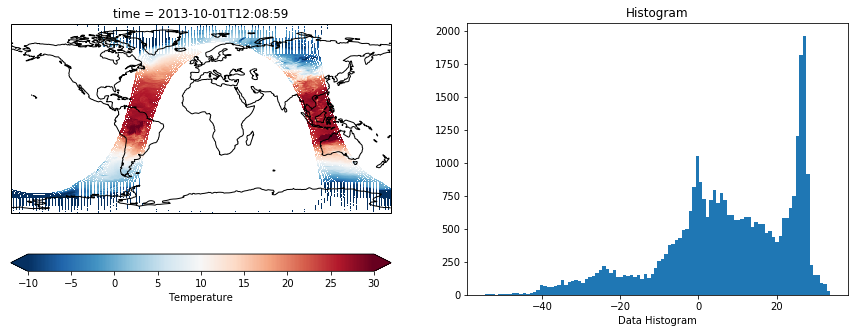

Loading data from orbit 20131001102955


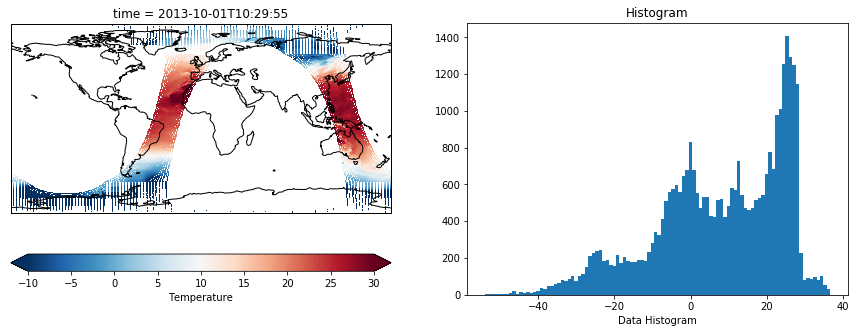

Loading data from orbit 20131001015955


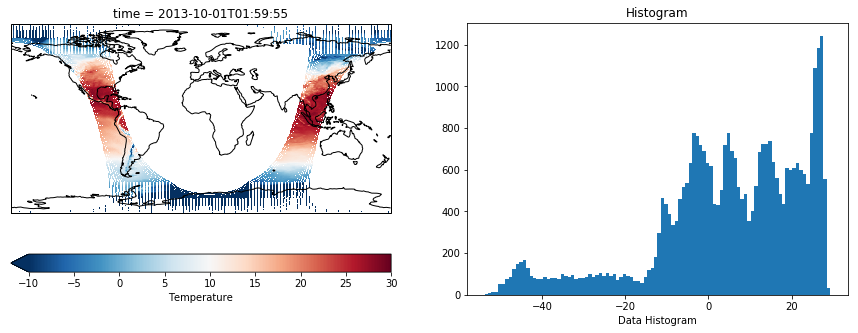

Loading data from orbit 20131001202954


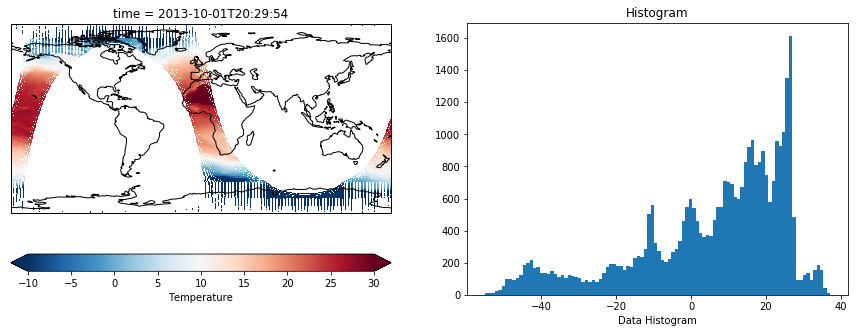

Loading data from orbit 20131001185058


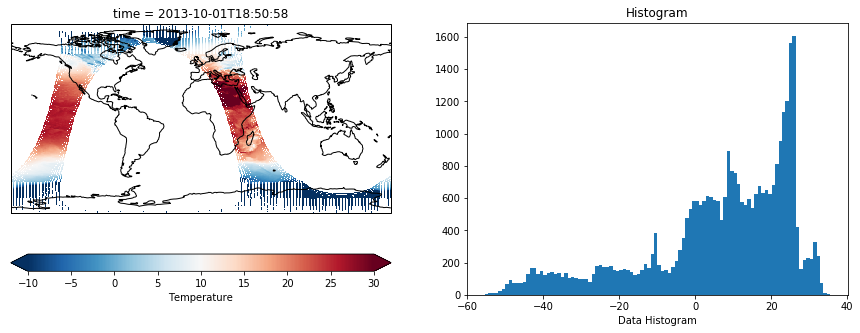

Loading data from orbit 20131001084755


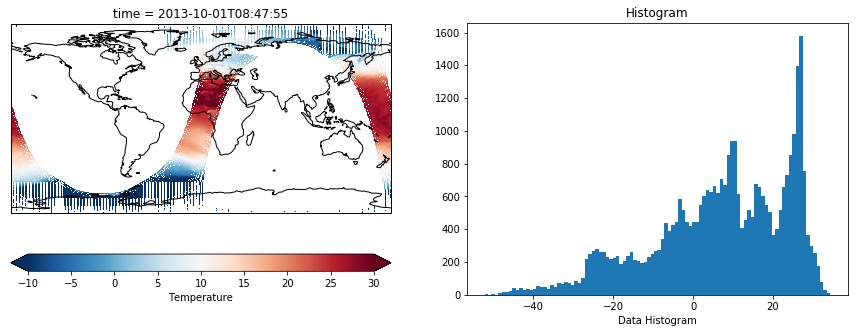

Loading data from orbit 20131001152954


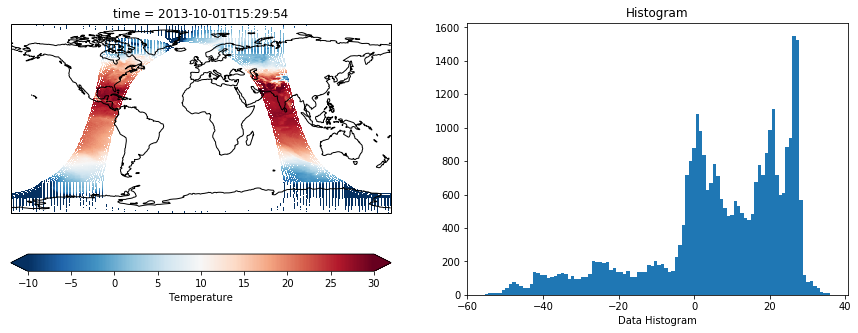

Loading data from orbit 20131001170858


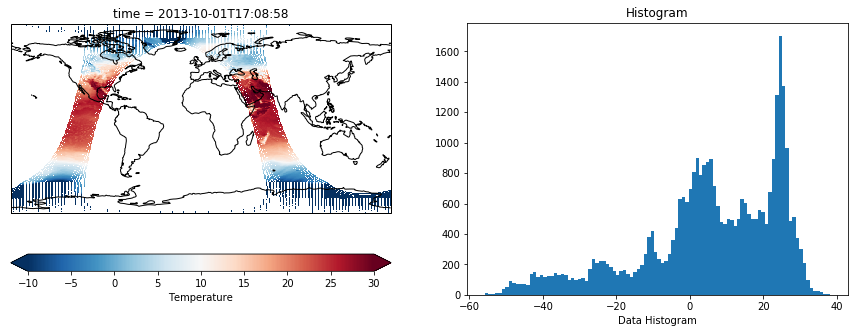

Loading data from orbit 20131001221154


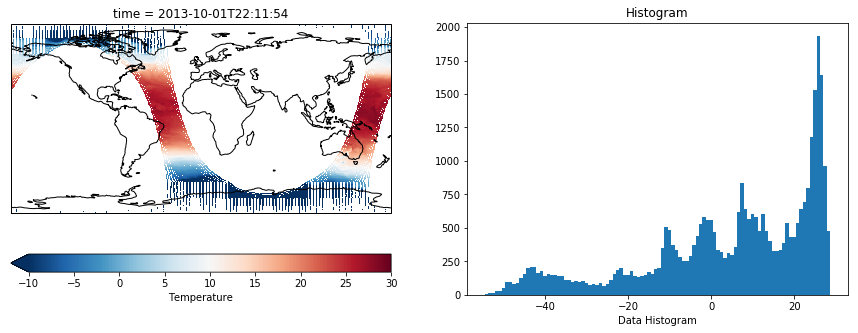

Loading data from orbit 20131001135058


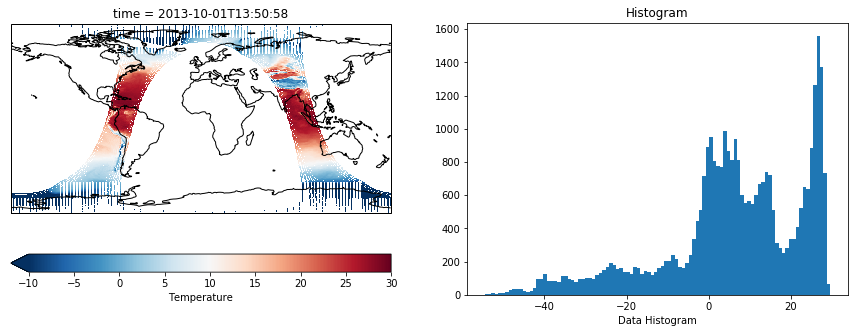

Loading data from orbit 20131001034155


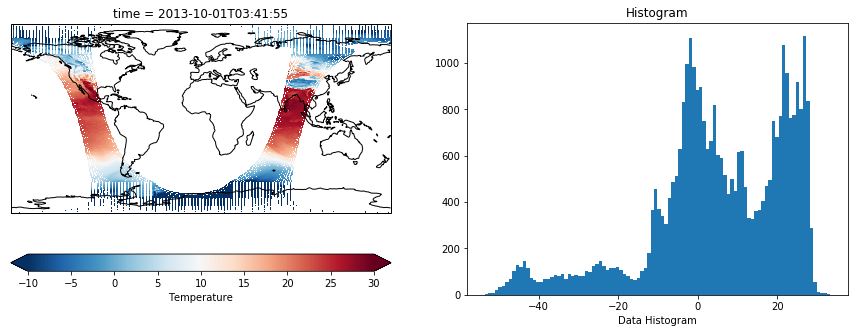

Loading data from orbit 20131001070555


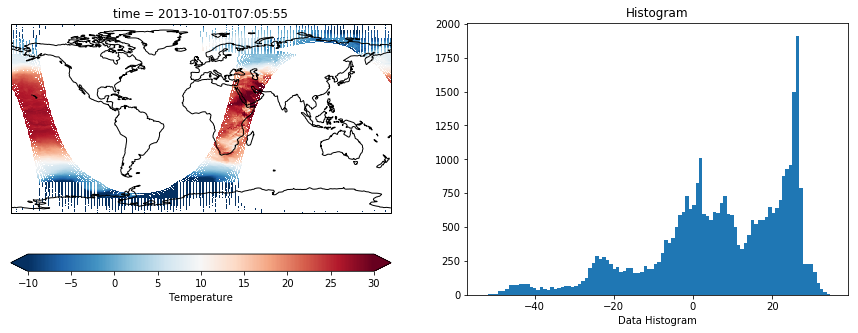

Loading data from orbit 20131001052355


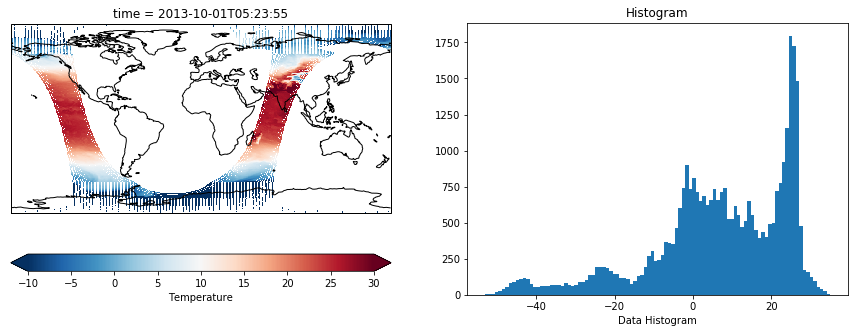

In [81]:
# Get Training Data
xr_dataaray = list()

for _, labels, lon, lat, iorbit in iasi_data.get_orbits():
    
    # Convert to Array
    dataset = create_dataarray(
        labels, 
        lat, 
        lon, 
        iorbit
    )
    
    # Remove Kelvin
    dataset -= 273.15
    
    
    # Plot Orbits
    plot_map(dataset.isel(time=0), std=False)
    
    # Append
    xr_dataaray.append(dataset)
    


## Plot Mean Orbits

In [82]:
xr_dataaray = xr.concat(xr_dataaray, dim='time')

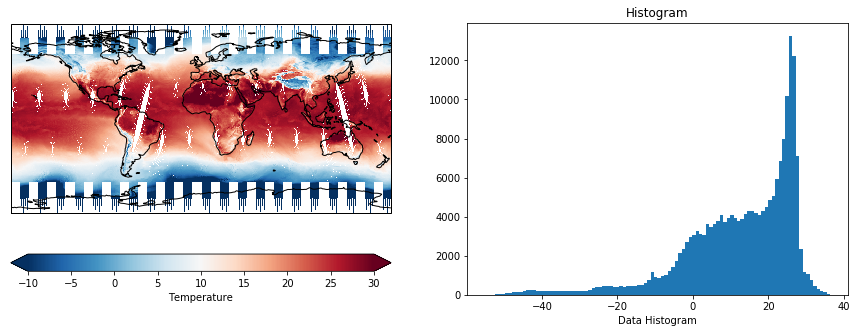

In [84]:
plot_map(xr_dataaray.mean(dim='time'), std=False)

/home/emmanuel/.conda/envs/2019_egp/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


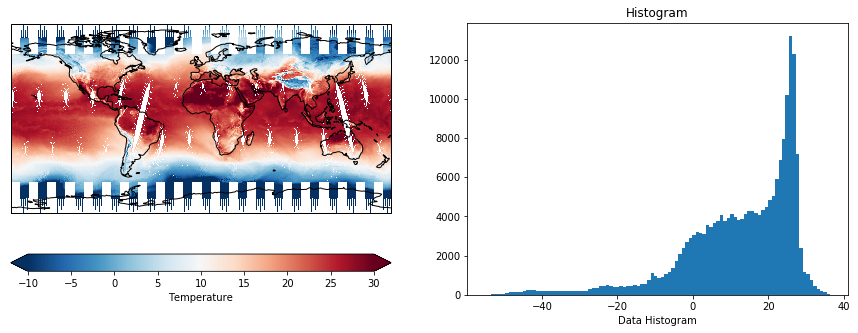

In [86]:
plot_map(xr_dataaray.median(dim='time'), std=False)

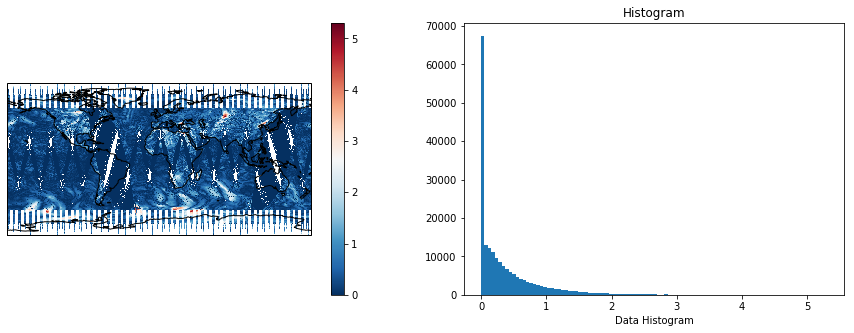

In [87]:
plot_map(xr_dataaray.std(dim='time'), std=True)

In [95]:
xr_dataaray

<xarray.DataArray (lat: 359, lon: 720, time: 13)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lon      (lon) float64 -179.5 -179.0 -178.5 -178.0 ... 179.0 179.5 180.0
  * lat      (lat) float64 -89.5 -89.0 -88.5 -88.0 -87.5 ... 88.0 88.5 89.0 89.5
  * time     (time) datetime64[ns] 2013-10-01T12:08:59 ... 2013-10-01T05:23:55

<Figure size 432x288 with 0 Axes>

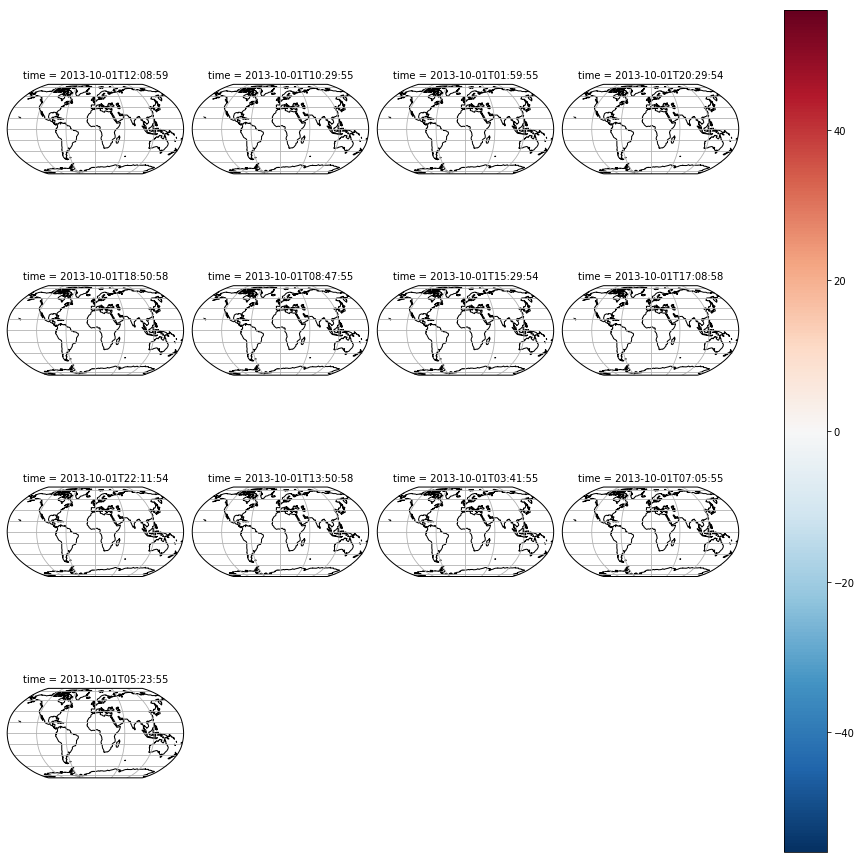

In [96]:
subplot_kws = {
    'projection': ccrs.Robinson()
}
fig = plt.figure()

p = xr_dataaray.plot.pcolormesh(
    x='lon', y='lat', col='time', col_wrap=4, 
    subplot_kws=subplot_kws
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()
    
plt.show()